In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

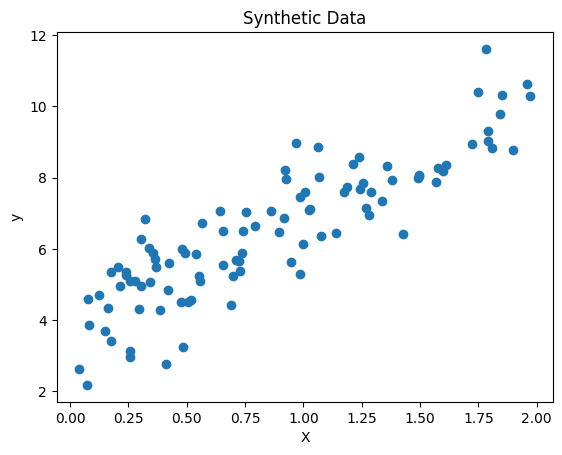

In [5]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

plt.scatter(X, y)
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
def predict(X, w, b):
    return X.dot(w) + b


In [7]:
def compute_cost(X, y, w, b):
    m = len(y)
    y_pred = predict(X, w, b)
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)
    return cost


In [8]:
def gradient_descent(X, y, w, b, lr, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = predict(X, w, b)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        w = w - lr * dw
        b = b - lr * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return w, b, cost_history


In [9]:
w_initial = np.zeros((1,1))
b_initial = 0

lr = 0.1
iterations = 1000

w_final, b_final, cost_history = gradient_descent(X, y, w_initial, b_initial, lr, iterations)

print("Learned weight:", w_final)
print("Learned bias:", b_final)


Iteration 0, Cost: 15.30018507291905
Iteration 100, Cost: 0.4259407941820834
Iteration 200, Cost: 0.42503846951075247
Iteration 300, Cost: 0.4250002693287396
Iteration 400, Cost: 0.42499865211272836
Iteration 500, Cost: 0.4249985836474097
Iteration 600, Cost: 0.4249985807489103
Iteration 700, Cost: 0.4249985806262015
Iteration 800, Cost: 0.4249985806210065
Iteration 900, Cost: 0.42499858062078655
Learned weight: [[3.11603524]]
Learned bias: 3.8199933807436124


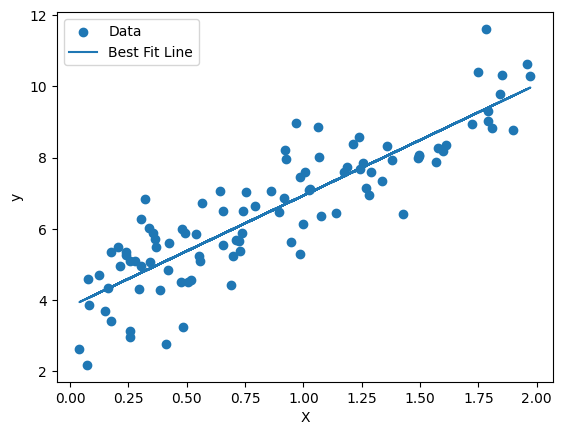

In [10]:
plt.scatter(X, y, label="Data")
plt.plot(X, predict(X, w_final, b_final), label="Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


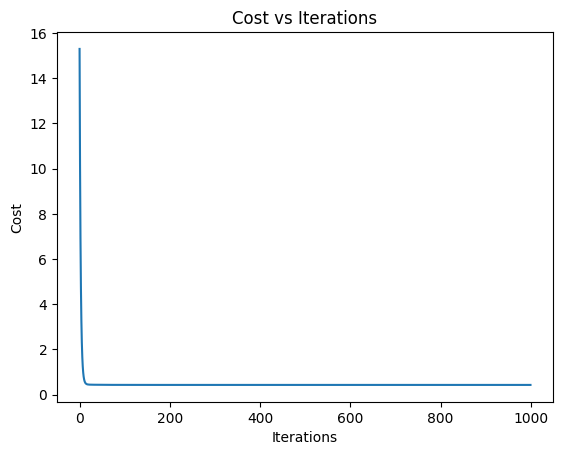

In [11]:
plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 0.5558915986952422
RMSE: 0.7455813830127749
R² Score: 0.5757877060324524


In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_poly_pred = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial MSE:", mse_poly)
print("Polynomial RMSE:", rmse_poly)
print("Polynomial R²:", r2_poly)


Polynomial MSE: 0.4643015261571134
Polynomial RMSE: 0.6813967465119813
Polynomial R²: 0.6456819711504156
